In [27]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

file_path = '/content/drive/MyDrive/smp_survey_answers.xlsx'
df = pd.read_excel(file_path)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [28]:
df = df.replace(["yes", "Yes", "Sim", "sim"], 1)
df = df.replace(["no", "No", "não", "Não"], 0)

<ipython-input-28-0a331c453067>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace(["yes", "Yes", "Sim", "sim"], 1)
<ipython-input-28-0a331c453067>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace(["no", "No", "não", "Não"], 0)


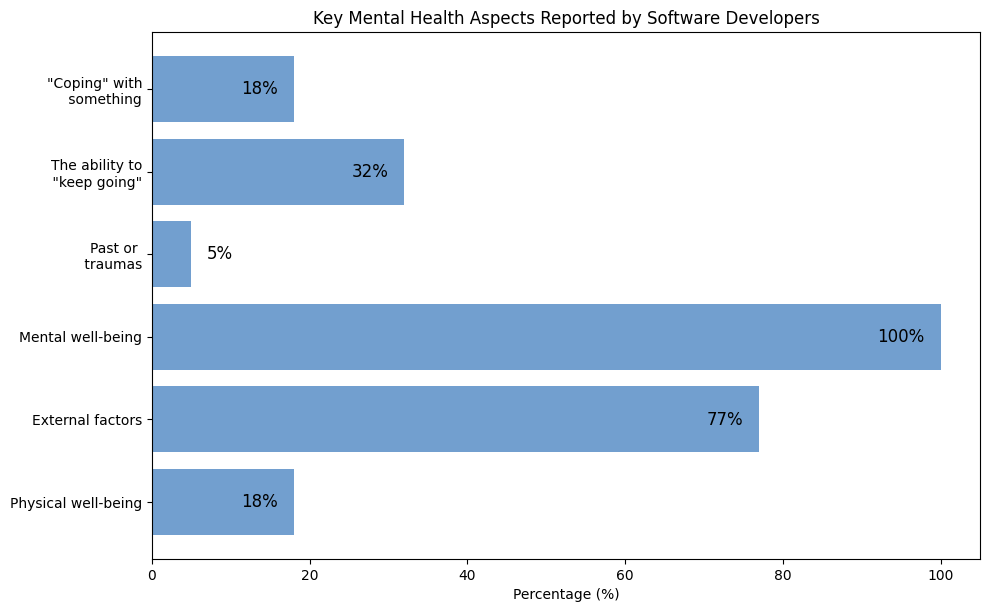

In [29]:
#GT - Mental Health

import matplotlib.pyplot as plt

# Dados
categories = [
    '"Coping" with\n something',
    'The ability to\n "keep going"',
    'Past or \n traumas',
    'Mental well-being',
    'External factors',
    'Physical well-being'
]

percentages = [18, 32, 5, 100, 77, 18]

# Configuração do gráfico
fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.barh(categories, percentages, color='#729FCF')

# Adicionar rótulos
ax.set_xlabel('Percentage (%)')
ax.set_title('')

# Exibir valores nas barras, ajustando a posição da terceira barra
for bar in bars:
    width = bar.get_width()
    if width > 10:
        # Valores dentro da barra se for grande o suficiente
        ax.annotate(f'{width}%',
                    xy=(width - 2, bar.get_y() + bar.get_height() / 2),
                    xytext=(0, 0),
                    textcoords="offset points",
                    color='black', fontsize=12,
                    ha='right', va='center')
    else:
        # Valores fora da barra se for muito pequena
        ax.annotate(f'{width}%',
                    xy=(width + 2, bar.get_y() + bar.get_height() / 2),
                    xytext=(0, 0),
                    textcoords="offset points",
                    color='black', fontsize=12,
                    ha='left', va='center')

plt.gca().invert_yaxis()  # Inverter a ordem para melhor leitura
plt.tight_layout()
plt.title("Key Mental Health Aspects Reported by Software Developers")
plt.show()


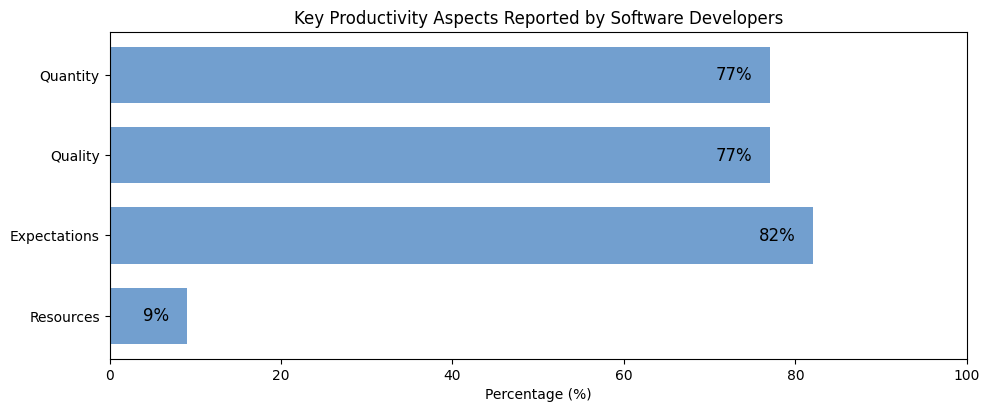

In [30]:
import matplotlib.pyplot as plt

# Dados
categories = [
    'Quantity',
    'Quality',
    'Expectations',
    'Resources'
]

percentages = [
    77,
    77,
    82,
    9
]

# Configuração do gráfico
fig, ax = plt.subplots(figsize=(10, 4))  # Reduzida a altura da figura

# Reduzindo altura das barras com height
bars = ax.barh(categories, percentages, color='#729FCF', height=0.7)  # Barras mais finas

# Ajustar limites do eixo X de 0 a 100
ax.set_xlim(0, 100)

# Adicionar rótulos
ax.set_xlabel('Percentage (%)')
ax.set_title('')

# Exibir valores nas barras
for bar in bars:
    width = bar.get_width()
    ax.annotate(f'{width}%',
                xy=(width - 2, bar.get_y() + bar.get_height() / 2),
                xytext=(0, 0),
                textcoords="offset points",
                color='black', fontsize=12,
                ha='right', va='center')

plt.gca().invert_yaxis()
plt.tight_layout()
plt.title("Key Productivity Aspects Reported by Software Developers")
plt.show()


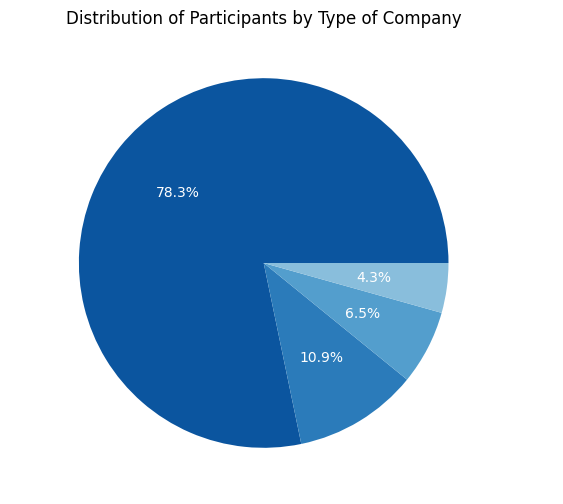

In [31]:
company_labels = ["Private sector", "Non-profit organization", "Startup", "Public sector"]
company_values = [36, 5, 3, 2]

plt.figure(figsize=(6, 6))
plt.pie(company_values, labels=company_labels, autopct="%1.1f%%", colors=sns.color_palette("Blues_r"), textprops={'color': 'white'} )
plt.title("Distribution of Participants by Type of Company")
plt.show()


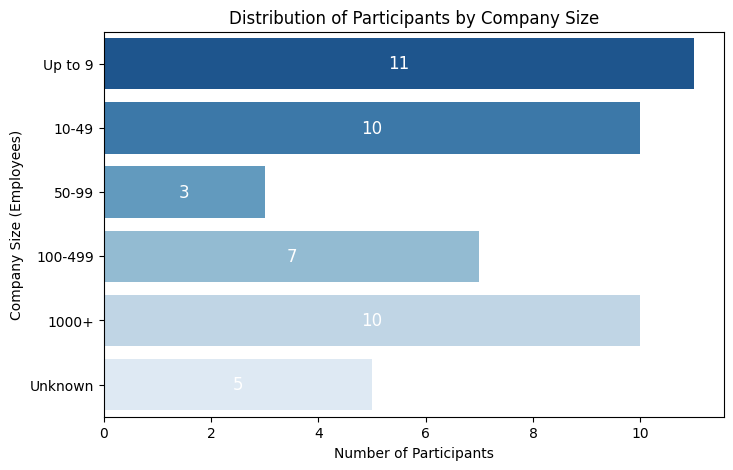

In [32]:
company_size_labels = ["Up to 9", "10-49", "50-99", "100-499", "1000+", "Unknown"]
company_size_values = [11, 10, 3, 7, 10, 5]

plt.figure(figsize=(8, 5))
ax = sns.barplot(y=company_size_labels, x=company_size_values, hue=company_size_labels, palette="Blues_r", orient="h")

for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='center', fontsize=12, color='white')

plt.ylabel("Company Size (Employees)")
plt.xlabel("Number of Participants")
plt.title("Distribution of Participants by Company Size")
plt.show()


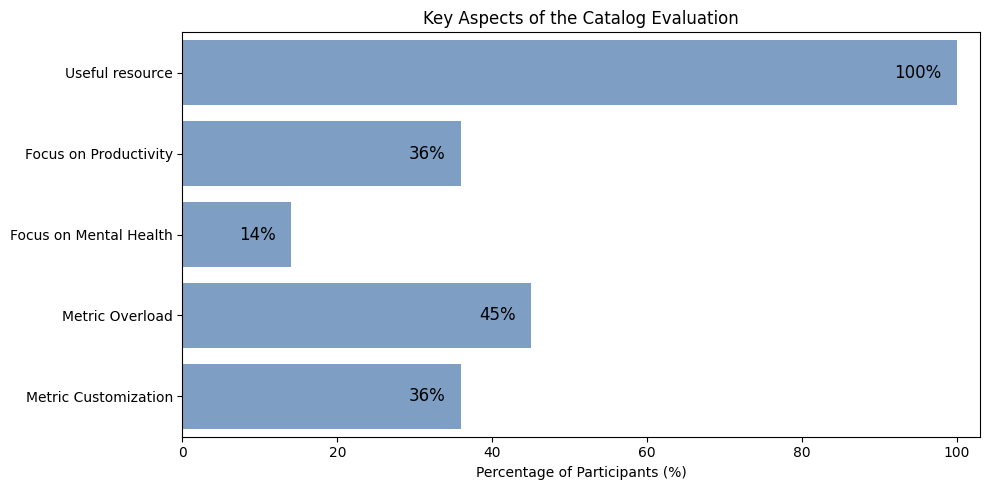

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

rq3_labels = ['Useful resource','Focus on Productivity','Focus on Mental Health','Metric Overload','Metric Customization']

rq3_values = [22,8,3,10,8]

# Convert to whole percentages
total = 22
rq3_percentages = [int(round((v / total) * 100, 0)) for v in rq3_values]

# Define fixed color
fixed_color = "#729FCF"

# Create the plot
plt.figure(figsize=(10, 5))
ax = sns.barplot(y=rq3_labels, x=rq3_percentages, color=fixed_color, orient="h")

# Set limit with a margin beyond 100%
ax.set_xlim(0, 103)

# Add the values on the bars
for bar, pct in zip(ax.patches, rq3_percentages):
    ax.text(bar.get_width() - 2 if pct > 10 else bar.get_width() - 5,
            bar.get_y() + bar.get_height() / 2,
            f"{pct}%",
            ha='right' if pct > 10 else 'left', va='center',
            fontsize=12, color='black')

plt.ylabel("")
plt.xlabel("Percentage of Participants (%)")
plt.title("Key Aspects of the Catalog Evaluation")
plt.tight_layout()
plt.show()


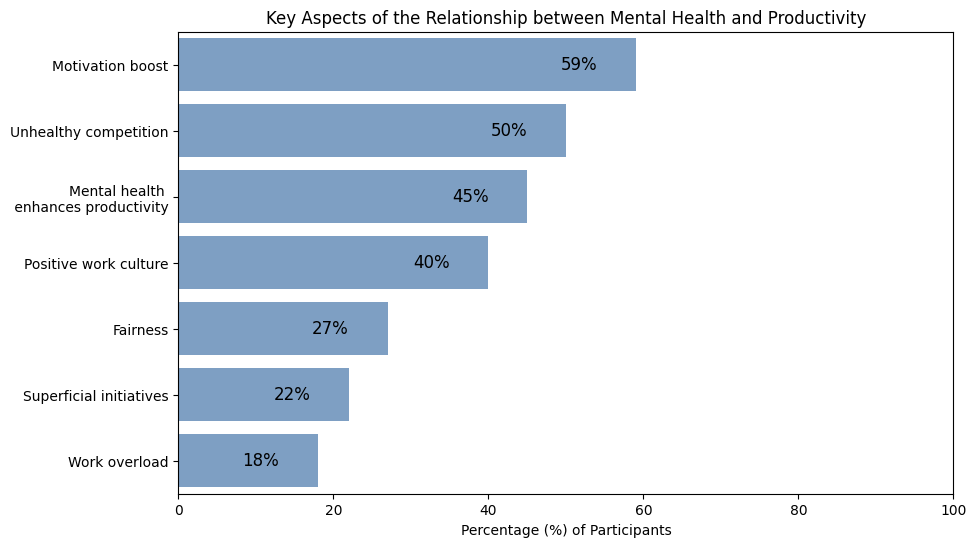

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

# Data
rq1_correlation_labels = [
    "Motivation boost", "Unhealthy competition", "Mental health \n enhances productivity",
    "Positive work culture", "Fairness", "Superficial initiatives", "Work overload"
]
rq1_correlation_values = [59, 50, 45, 40, 27, 22, 18]  # Already in percentage

# Define fixed color in RGB
fixed_color = "#729FCF"  # Fixed blue color

# Creating the plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(y=rq1_correlation_labels, x=rq1_correlation_values, color=fixed_color, orient="h")
ax.set_xlim(0, 100)

# Adding percentage values on top of the bars
for bar, value in zip(ax.patches, rq1_correlation_values):
    ax.text(bar.get_width() - 5,  # Adjusted X position
            bar.get_y() + bar.get_height()/2,  # Y position centered
            f"{value}%",  # Label text
            ha='right', va='center',  # Alignment
            fontsize=12, color='black')

plt.ylabel("")
plt.xlabel("Percentage (%) of Participants")
plt.title("Key Aspects of the Relationship between Mental Health and Productivity")
plt.show()


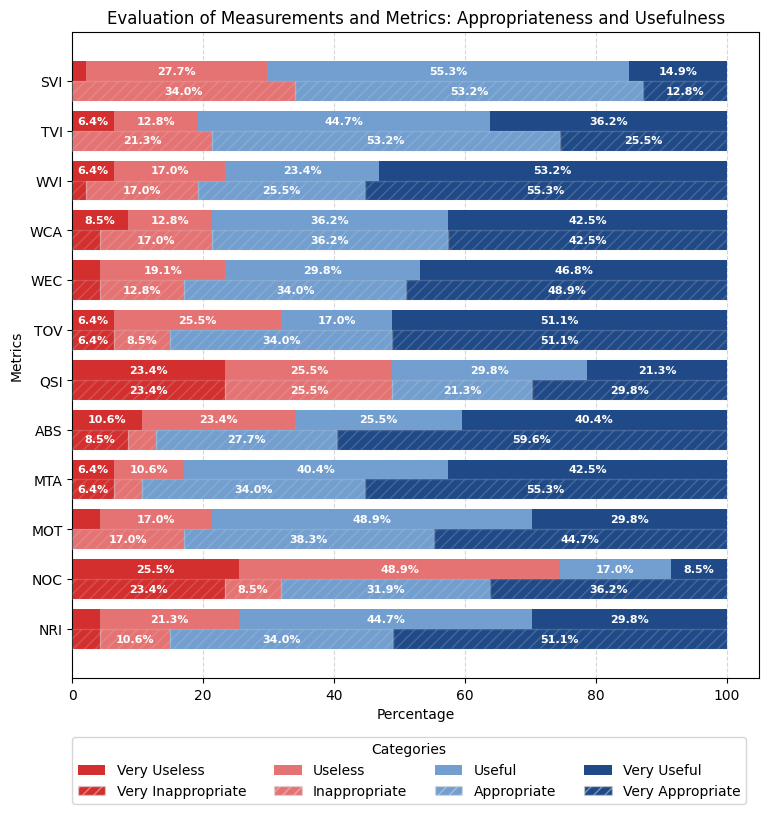

In [36]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Patch

# Simulated data
labels = ['NRI', 'NOC', 'MOT', 'MTA', 'ABS', 'QSI', 'TOV', 'WEC', 'WCA', 'WVI', 'TVI', 'SVI']

categories = [
    "Very Useless", "Very Inappropriate", "Useless", "Inappropriate", "Useful", "Appropriate", "Very Useful", "Very Appropriate"
]

# Data for the pairs
data1 = np.array([
    [4.26, 10.64, 34.04, 51.06],
    [23.4, 8.51, 31.91, 36.17],
    [0, 17.02, 38.3, 44.68],
    [6.38, 4.26, 34.04, 55.32],
    [8.51, 4.26, 27.66, 59.57],
    [23.4, 25.53, 21.28, 29.79],
    [6.38, 8.51, 34.04, 51.06],
    [4.26, 12.77, 34.04, 48.94],
    [4.26, 17.02, 36.17, 42.55],
    [2.13, 17.02, 25.53, 55.32],
    [0, 21.28, 53.19, 25.53],
    [0, 34.04, 53.19, 12.77]
])

data2 = np.array([
    [4.26, 21.28, 44.68, 29.79],
    [25.53, 48.94, 17.02, 8.51],
    [4.26, 17.02, 48.94, 29.79],
    [6.38, 10.64, 40.43, 42.55],
    [10.64, 23.4, 25.53, 40.43],
    [23.4, 25.53, 29.79, 21.28],
    [6.38, 25.53, 17.02, 51.06],
    [4.26, 19.15, 29.79, 46.81],
    [8.51, 12.77, 36.17, 42.55],
    [6.38, 17.02, 23.4, 53.19],
    [6.38, 12.77, 44.68, 36.17],
    [2.13, 27.66, 55.32, 14.89]
])

colors = ['#D32F2F', '#E57373', '#729FCF', '#204A87']

# Increase spacing between the pairs of bars
y_positions = np.arange(len(labels)) * 3

fig, ax = plt.subplots(figsize=(8, 8))

bar_height = 1.2

# Plot the bars for each data set
for i, (colname, color) in enumerate(zip(categories, colors)):
    widths1 = data1[:, i]
    starts1 = np.cumsum(data1, axis=1)[:, i] - widths1
    bars1 = ax.barh(y_positions - bar_height / 2, widths1, height=bar_height, left=starts1, color=color, label=colname, zorder=2)

    widths2 = data2[:, i]
    starts2 = np.cumsum(data2, axis=1)[:, i] - widths2
    bars2 = ax.barh(y_positions + bar_height / 2, widths2, height=bar_height, left=starts2, color=color, zorder=2)

    # Create texture on the bars of the first group
    for j in range(len(labels)):
        ax.barh(y_positions[j] - bar_height / 2, widths1[j], height=bar_height, left=starts1[j],
                color='none', edgecolor='#DDDDDD', hatch='///', zorder=3, alpha=0.2)

# Add percentage values inside the bars
for i in range(4):
    for j in range(len(labels)):
        width1 = data1[j, i]
        start1 = np.cumsum(data1[j]) - width1

        width2 = data2[j, i]
        start2 = np.cumsum(data2[j]) - width2

        if width1 > 5:  # Avoid text overload
            ax.text(start1[i] + width1 / 2, y_positions[j] - bar_height / 2, f"{width1:.1f}%",
                    ha='center', va='center', fontsize=8, color='white', fontweight='bold', zorder=4)

        if width2 > 5:
            ax.text(start2[i] + width2 / 2, y_positions[j] + bar_height / 2, f"{width2:.1f}%",
                    ha='center', va='center', fontsize=8, color='white', fontweight='bold', zorder=4)

# Adjust labels and layout
ax.set_yticks(y_positions)
ax.set_yticklabels(labels)


# Create legend_patches for the categories
legend_patches = []
legend_patches.append(Patch(facecolor='#D32F2F', label='Very Useless'))
legend_patches.append(Patch(facecolor='#D32F2F', edgecolor='#DDDDDD80', hatch='///', label='Very Inappropriate'))
legend_patches.append(Patch(facecolor='#E57373', label='Useless'))
legend_patches.append(Patch(facecolor='#E57373', edgecolor='#DDDDDD80', hatch='///', label='Inappropriate'))
legend_patches.append(Patch(facecolor='#729FCF', label='Useful'))
legend_patches.append(Patch(facecolor='#729FCF', edgecolor='#DDDDDD80', hatch='///', label='Appropriate'))
legend_patches.append(Patch(facecolor='#204A87', label='Very Useful'))
legend_patches.append(Patch(facecolor='#204A87', edgecolor='#DDDDDD80', hatch='///', label='Very Appropriate'))


# Reorganize the order of the handles and labels to display in rows
# First row: 0, 1, 2, 3
# Second row: 4, 5, 6, 7
handles = legend_patches[:4] + legend_patches[4:]  # Sort by row
labels_ = categories[:4] + categories[4:]  # Sort by row

# Add the legend
ax.legend(handles=legend_patches, labels=categories, loc='upper center', bbox_to_anchor=(0.49, -0.08),
          title="Categories", fontsize=10, ncol=4)

plt.xlabel("Percentage", fontsize=10)
plt.ylabel("Metrics", fontsize=10)

plt.grid(axis='x', linestyle='--', alpha=0.5, zorder=3)
plt.xlim(0, 105)
plt.tight_layout()
plt.title("Evaluation of Measurements and Metrics: Appropriateness and Usefulness")
plt.show()


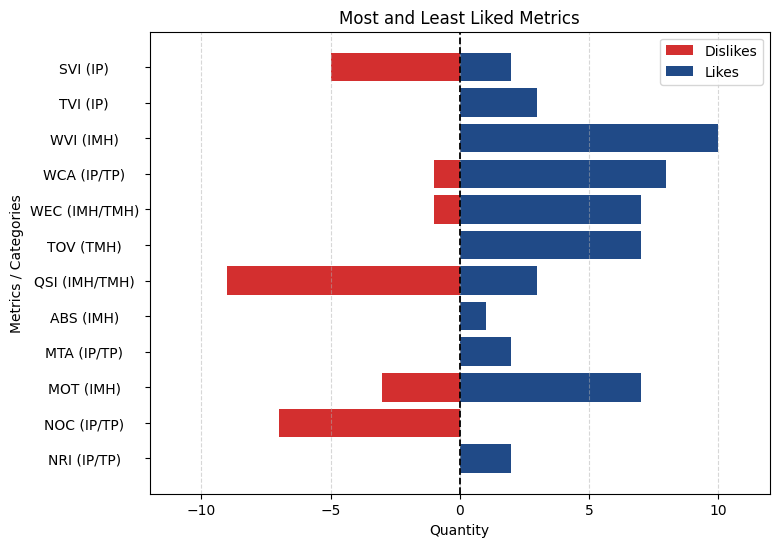

In [37]:
import matplotlib.pyplot as plt
import numpy as np

# Data extracted from the table
metrics = ["SVI (IP)", "TVI (IP)", "WVI (IMH)", "WCA (IP/TP)", "WEC (IMH/TMH)", "TOV (TMH)", "QSI (IMH/TMH)", "ABS (IMH)", "MTA (IP/TP)", "MOT (IMH)", "NOC (IP/TP)", "NRI (IP/TP)"]
likes = np.array([2, 3, 10, 8, 7, 7, 3, 1, 2, 7, 0, 2])
dislikes = np.array([5, 0, 0, 1, 1, 0, 9, 0, 0, 3, 7, 0])

# Reverse the order of the data for correct display on the graph
metrics = metrics[::-1]
likes = likes[::-1]
dislikes = dislikes[::-1]

# Creating positions for the metrics
y_positions = np.arange(len(metrics))

# Creating the figure and axis
fig, ax = plt.subplots(figsize=(8, 6))

# Creating the split bars
ax.barh(y_positions, -dislikes, color="#D32F2F", label="Dislikes")  # Red for Dislikes (negative)
ax.barh(y_positions, likes, color="#204A87", label="Likes")  # Blue for Likes (positive)

# Graph settings
ax.set_yticks(y_positions)
ax.set_yticklabels(metrics)
ax.set_xlabel("Quantity")
ax.set_ylabel("Metrics / Categories")

#ax.set_title("Distribution of Likes and Dislikes by Metric")

# Adjusting the X-axis limits to center on zero
limite_x = max(likes.max(), dislikes.max()) + 2
ax.set_xlim(-limite_x, limite_x)

# Adding a central line at zero
ax.axvline(0, color='black', linewidth=1.3, linestyle='--')

# Adding the legend
ax.legend()

# After defining the yticklabels
ax.set_yticklabels(metrics)

# Aligning the yticklabels to the left
for label in ax.get_yticklabels():
    label.set_horizontalalignment('center')
    label.set_x(-0.09)  # Adjust this value as necessary

# Displaying the graph
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.title("Most and Least Liked Metrics")
plt.show()
